# Problem Statement:
    
The crucial target of this data science project i.e. prediction of BigMart sales is to build a predictive model and find out the sales of each product at a particular store. The idea is to find out the properties of a product, and store which impacts the sales of a product.

# Data Description:

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. BigMart wants to understand the properties of products and stores which play a key role in increasing sales.
The data has missing values as some stores do not report all the data due to technical glitches. 


# Hypothesis Generation:

### Product Level Hypotheses:

1)**Brand** : Branded products have more trust of the customers so they should have high sales.

2)**Visibility in Store**: The location of the product placement also depends on the sales.

3)**Display Area**: Products that are placed at an attention-catching place should have more sales.

4)**Utility**: Daily use products have a higher tendency to sell compared to other products.

5)**Packaging**: Quality packaging can attract customers and sell more.

6)**Advertising**: Better advertising of products in the store should rise sales of products in most cases.

7)**Promotional Offers**: Products accompanied with attractive offers and discounts sell more.



### Store Level Hypotheses:

1)**City type**: Stores located in urban cities should have higher sales.

2)**Store Capacity**: One-stop shops are big in size so their sell should be high.

3)**Population Density**: Densely populated areas have high demands so the store located in these areas should have higher sales.

4)**Marketing**: Stores having a good marketing division can attract customers through the right offers.

5)**Location**: Stores located within popular marketplaces should have higher sales because of better access to customers.

6)**Customer Behaviour**: Stores keeping the right set of products to meet the local needs of customers should have higher sales.

7)**Ambiance**: Stores which are well-maintained and managed by polite and humble people are expected to have higher footfall and thus higher sales.


# Loading Packages and Data:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Ignores Any Warning
import warnings 
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv(r"D:/Technocolabs/Prediction of BigMart Sales/Train.csv") 
test = pd.read_csv(r"D:/Technocolabs/Prediction of BigMart Sales/Test.csv")

In [3]:
train.shape

(8523, 12)

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
test.shape

(5681, 11)

In [8]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
train.duplicated().sum()

0

In [12]:
test.duplicated().sum()

0

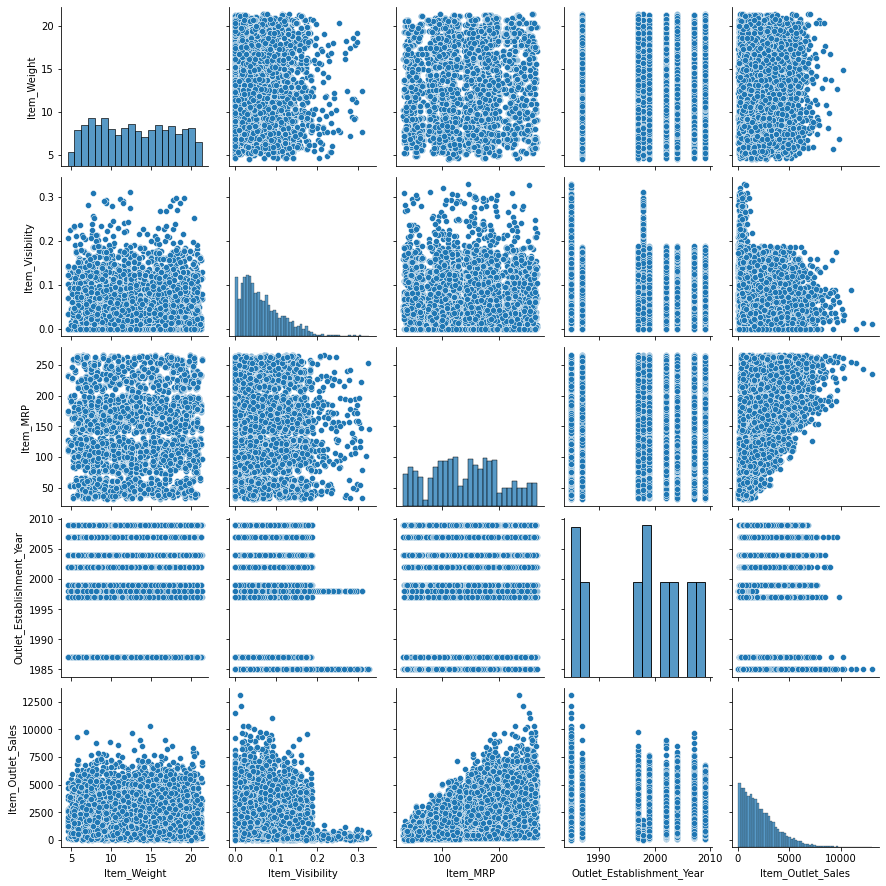

In [13]:
sns.pairplot(train)

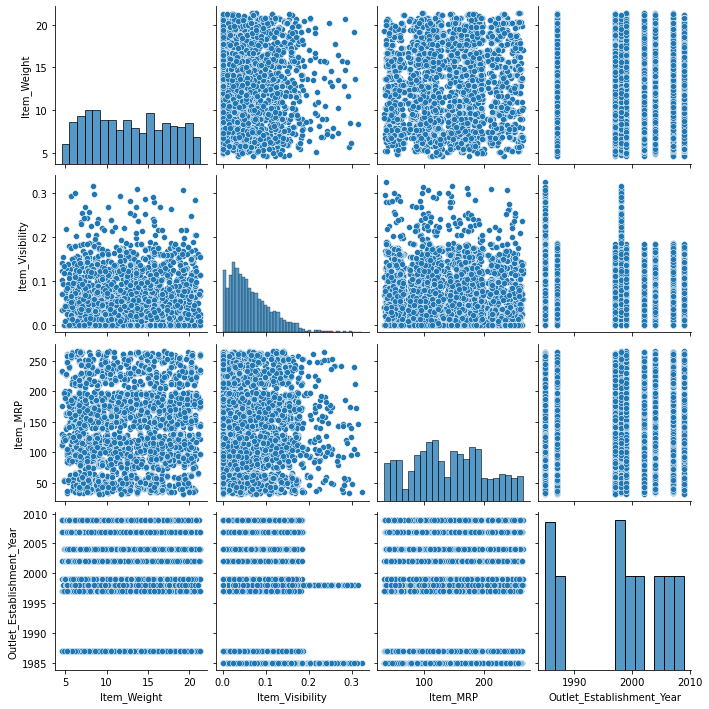

In [14]:
sns.pairplot(test)

### Conclusion:

The train dataset consists of 8523 observations with 12 features which contain 4 float, 1 integer and 7 object values. In the dataset there are no duplicated values. Hence, above we have the information and description needed regarding the train dataset. The dataset contains details about the train data like Item_Weight, Item_Visibility, Item_Type, Outlet_Size and so on. A pairplot for numerical variables of train data is plotted.

The test dataset consists of 5681 observations with 11 features which contain 3 float, 1 integer and 7 object values. In the dataset there are no duplicated values. Hence, above we have the information and description needed regarding the test dataset. The dataset contains details about the test data like Item_Weight, Item_Visibility, Item_Type, Outlet_Size and so on similar to the train data, but does not have Item_Outlet_Sales column as in train data. A pairplot for numerical variables of test data is plotted.

# Missing Value Treatment:

 **Checking For Missing Values:**

In [15]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Checking For Missing Values:**

In [16]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

### Imputing Missing Values of Numerical Variable using Mean:

In [17]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace = True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace = True)

### Imputing Missing Values of Categorical Variable using Mode:

In [18]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace = True)

**After Replacing Missing Values:**

In [19]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**After Replacing Missing Values:**

In [20]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

### Conclusion:

The NA values of Item_Weight column in train and test data is imputed using mean imputation method whereas the NA values of Outlet_Size column in train and test data is imputed using mode imputation method.

# Exploratory Data Analysis:

### Univariate Analysis:

### For Numerical Variables:

Text(0.5, 1.0, 'Item Weight Distribution')

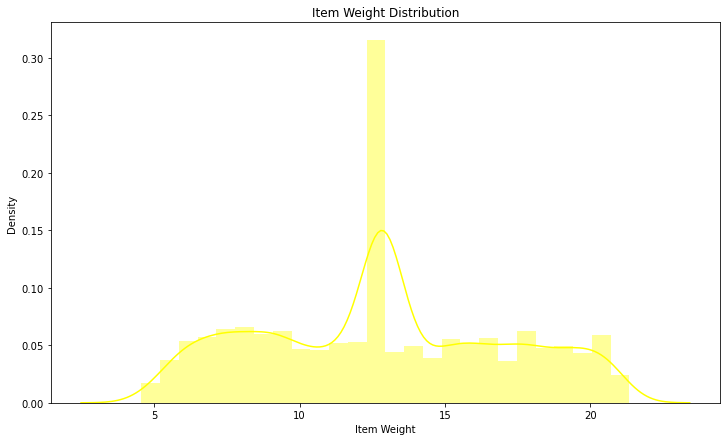

In [21]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Weight, color='yellow')
plt.xlabel("Item Weight")
plt.ylabel("Density")
plt.title("Item Weight Distribution")

In [22]:
print ("Skewness is:",train.Item_Weight.skew())
print("Kurtosis is:",train.Item_Weight.kurt())

Skewness is: 0.09056145191764828
Kurtosis is: -0.8602944788067419


Text(0.5, 1.0, 'Item Visibility Distribution')

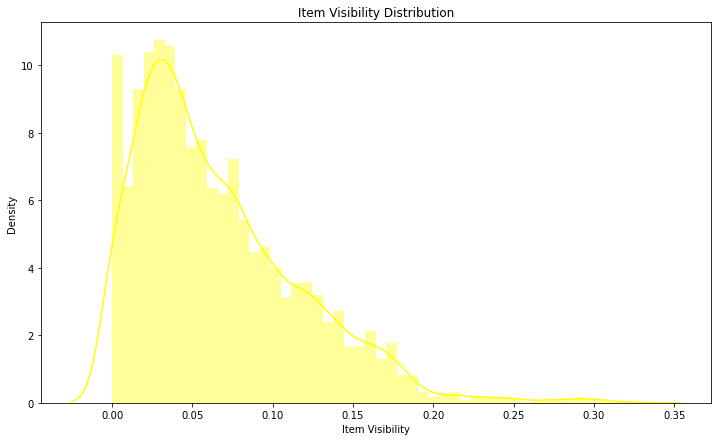

In [23]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Visibility, color='yellow')
plt.xlabel("Item Visibility")
plt.ylabel("Density")
plt.title("Item Visibility Distribution")

In [24]:
print ("Skewness is:",train.Item_Visibility.skew())
print("Kurtosis is:",train.Item_Visibility.kurt())

Skewness is: 1.1670905496918396
Kurtosis is: 1.6794454826024237


Text(0.5, 1.0, 'Item MRP Distribution')

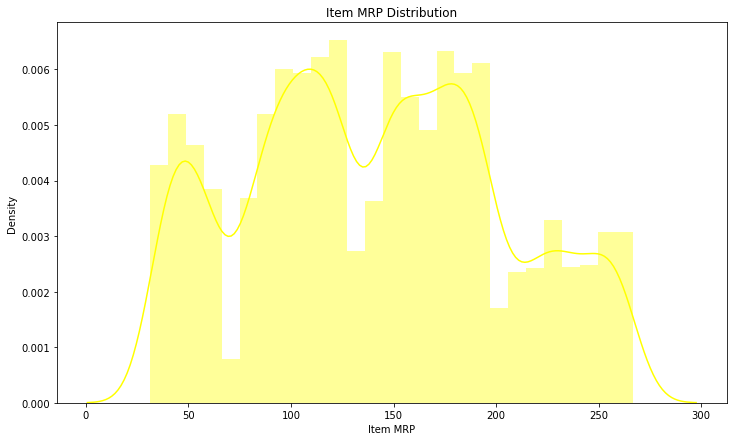

In [25]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_MRP, color='yellow')
plt.xlabel("Item MRP")
plt.ylabel("Density")
plt.title("Item MRP Distribution")

In [26]:
print ("Skewness is:",train.Item_MRP.skew())
print("Kurtosis is:",train.Item_MRP.kurt())

Skewness is: 0.1272022683110526
Kurtosis is: -0.8897690936963571


Text(0.5, 1.0, 'Outlet Establishment Year Distribution')

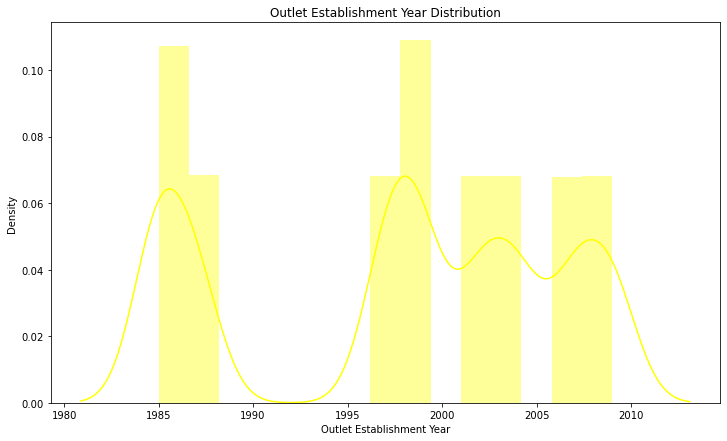

In [27]:
plt.figure(figsize=(12,7))
sns.distplot(train.Outlet_Establishment_Year, color='yellow')
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Density")
plt.title("Outlet Establishment Year Distribution")

In [28]:
print ("Skewness is:",train.Outlet_Establishment_Year.skew())
print("Kurtosis is:",train.Outlet_Establishment_Year.kurt())

Skewness is: -0.39664078591550556
Kurtosis is: -1.2056939170205112


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

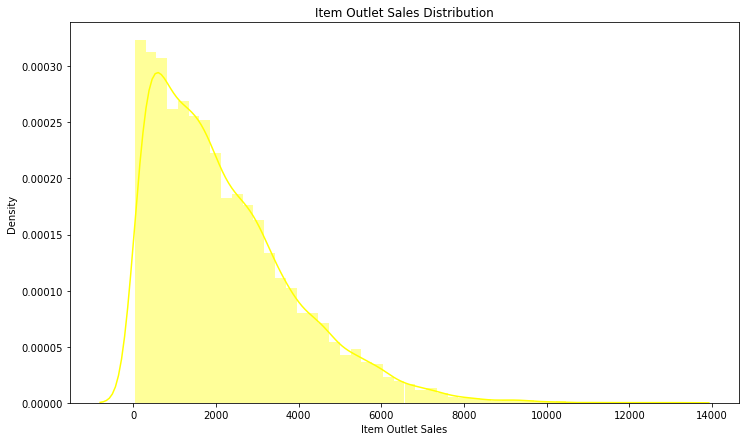

In [29]:
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales, color='yellow')
plt.xlabel("Item Outlet Sales")
plt.ylabel("Density")
plt.title("Item Outlet Sales Distribution")

In [30]:
print ("Skewness is:",train.Item_Outlet_Sales.skew())
print("Kurtosis is:",train.Item_Outlet_Sales.kurt())

Skewness is: 1.1775306028542796
Kurtosis is: 1.6158766814287264


We can see that the target variable i.e Item_Outlet_Sales is skewed towards the right. Therefore, we have to normalize it. Also, we have the distribution plots for Item_Weight, Item_Visibility, Item_MRP and Outlet_Establishment_Year compiled above along with their respective skewness and kurtosis values.

**Checking For The Number Of Numerical Variables In Dataset:**

In [31]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

We can see that we have only 5 numeric variables out of 12.

**Checking Correlation Between Numerical Variables And Target Variable:**

In [32]:
corr=numerical_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [33]:
corr['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

**Distribution Of The Correlated Variables In A Heatmap:**

Text(0.5, 1.0, 'Heatmap for Numerical Correlated Variables')

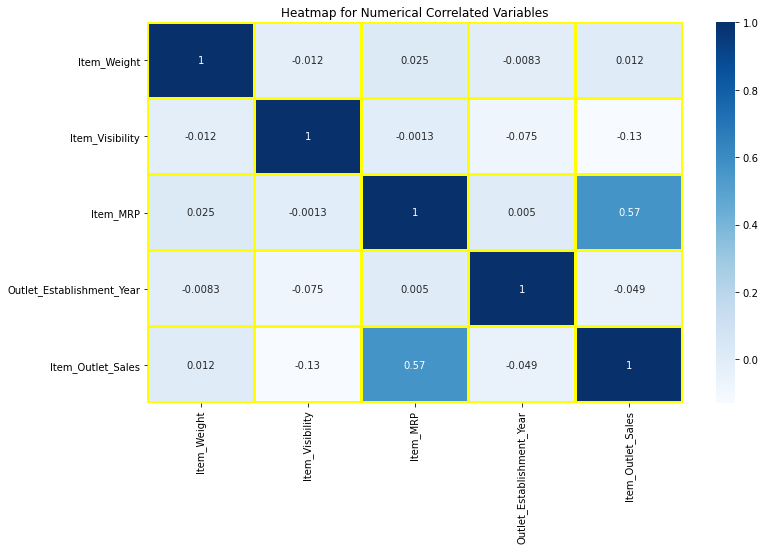

In [34]:
plt.figure(figsize=(12,7))
sns.heatmap(train.corr(),annot = True, cmap = 'Blues',linewidths = 2,linecolor = "yellow")
plt.title("Heatmap for Numerical Correlated Variables")

From the above result, we can see that Item_MRP have the most positive correlation and the Item_Visibility have the lowest correlation with the target variable. 

### For Categorical Variables:

**Distribution Of The Variable Item_Fat_Content:**

Text(0, 0.5, 'Count')

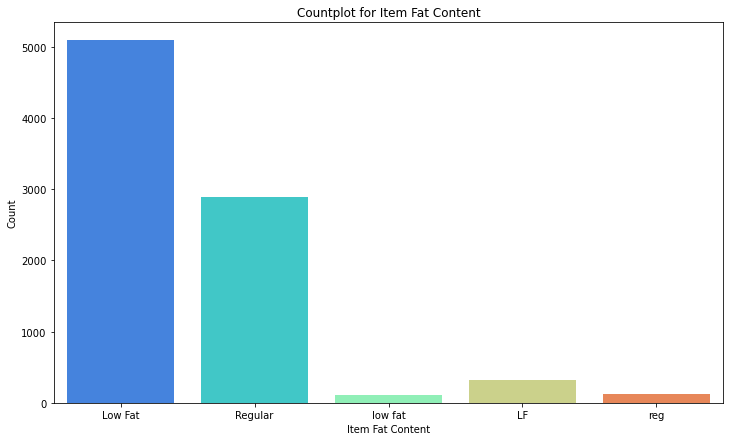

In [35]:
plt.figure(figsize=(12,7))
sns.countplot(train.Item_Fat_Content, palette='rainbow')
plt.title("Countplot for Item Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Count")

For Item_Fat_Content there are two possible types “Low Fat” or “Regular”. However, in the data it is written in different manner which will be further corrected in the analysis.

**Distribution Of The Variable Item_Type:**

Text(0, 0.5, 'Count')

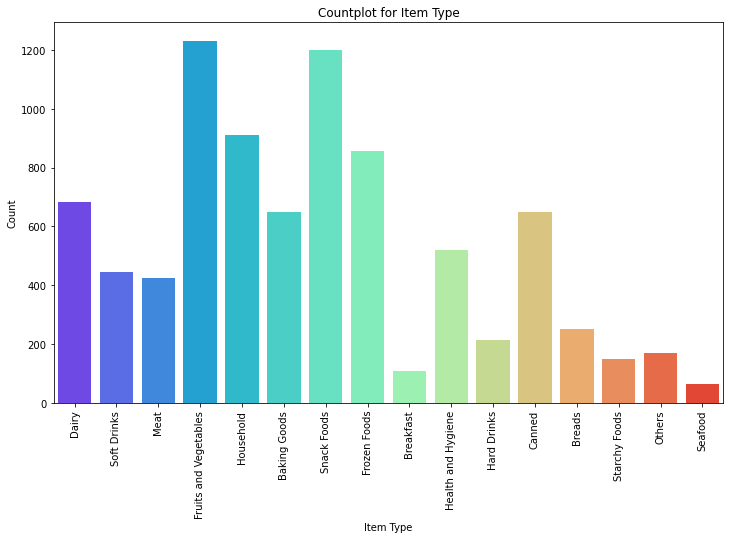

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(train.Item_Type, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Countplot for Item Type")
plt.xlabel("Item Type")
plt.ylabel("Count")

For Item_Type we have 16 different types of unique values which is a high number for categorical variables. Therefore we must try to reduce it further in the analysis process.

**Distribution Of The Variable Outlet_Size:**

Text(0, 0.5, 'Count')

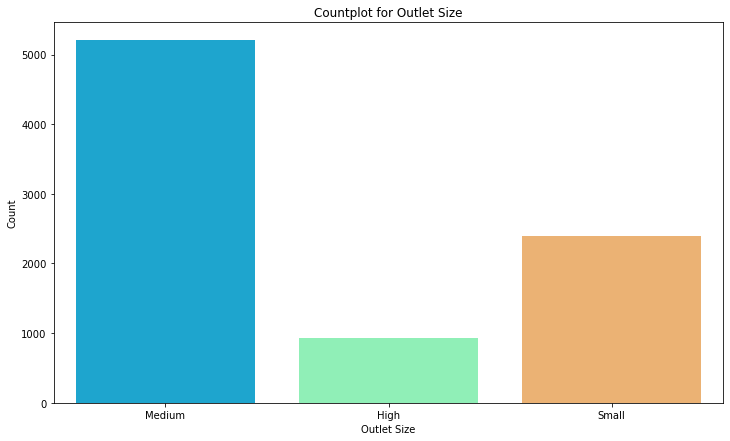

In [37]:
plt.figure(figsize=(12,7))
sns.countplot(train.Outlet_Size, palette='rainbow')
plt.title("Countplot for Outlet Size")
plt.xlabel("Outlet Size")
plt.ylabel("Count")

There seems to be less number of stores with size equals to “High”. It will be very interesting to see how this variable relates to the target variable.

**Distribution Of The Variable Outlet_Location_Type:**

Text(0, 0.5, 'Count')

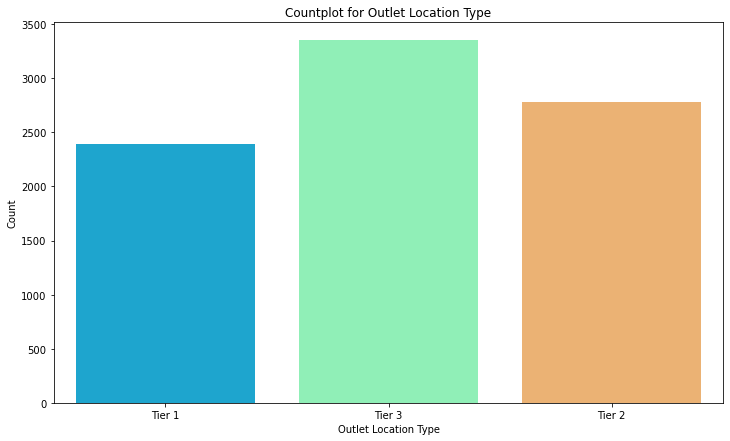

In [38]:
plt.figure(figsize=(12,7))
sns.countplot(train.Outlet_Location_Type, palette='rainbow')
plt.title("Countplot for Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Count")

From the above graph we can see that Bigmart is a brand of medium and small size city compared to densely populated area.

**Distribution Of The Variable Outlet_Type:**

Text(0, 0.5, 'Count')

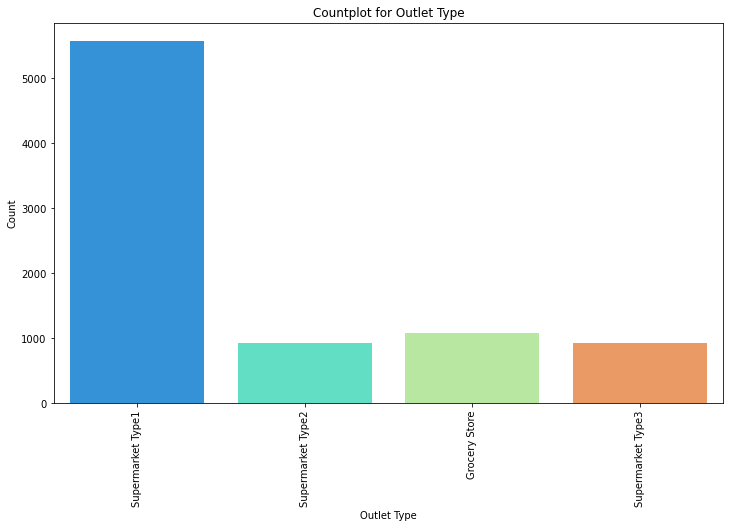

In [39]:
plt.figure(figsize=(12,7))
sns.countplot(train.Outlet_Type, palette='rainbow')
plt.xticks(rotation=90)
plt.title("Countplot for Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Count")

There seems like "Supermarket Type2" , "Grocery Store"and "Supermarket Type3" have low numbers of stores, we can create a single category with all three of them, but before doing this we must see their impact on target variable.

### Bivariate Analysis:

### For Numerical Variables:

**Item_Weight And Item_Outlet_Sales Analysis:**

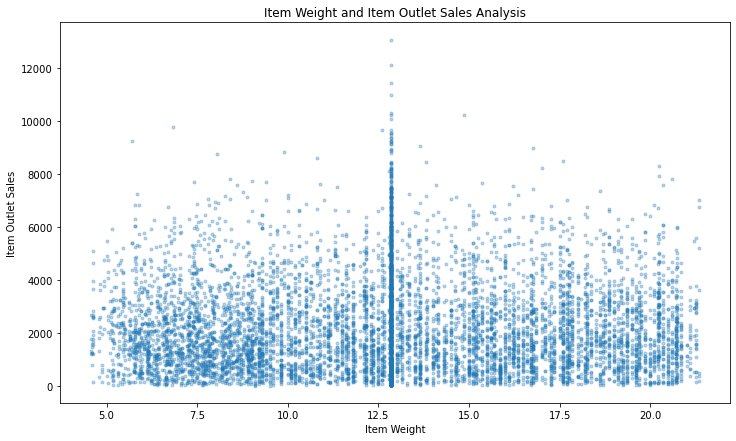

In [40]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.title("Item Weight and Item Outlet Sales Analysis")
plt.plot(train.Item_Weight, train["Item_Outlet_Sales"],'.', alpha = 0.3)

As we can see that Item_Weight has a low i.e negative correlation with the target variable. This plot shows their relation.

**Item_MRP And Item_Outlet_Sales Analysis:**

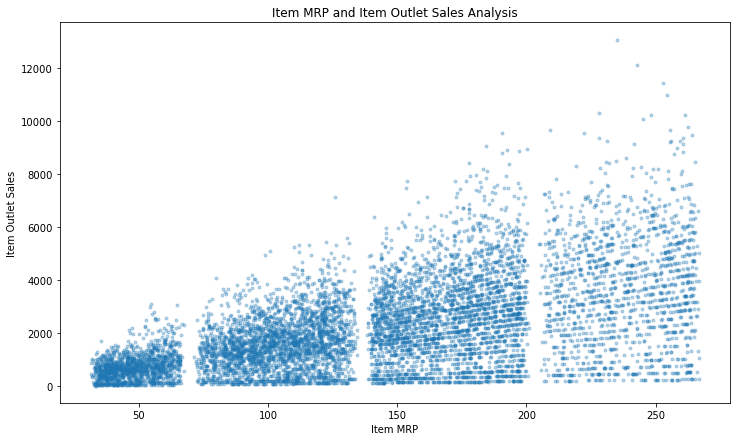

In [41]:
plt.figure(figsize=(12,7))
plt.xlabel("Item MRP")
plt.ylabel("Item Outlet Sales")
plt.title("Item MRP and Item Outlet Sales Analysis")
plt.plot(train.Item_MRP, train["Item_Outlet_Sales"],'.', alpha = 0.3)

As we can see that Item_MRP has the most highest i.e positive correlation with the target variable. This plot shows their relation.

**Item_Visibility And Item_Outlet_Sales Analysis:**

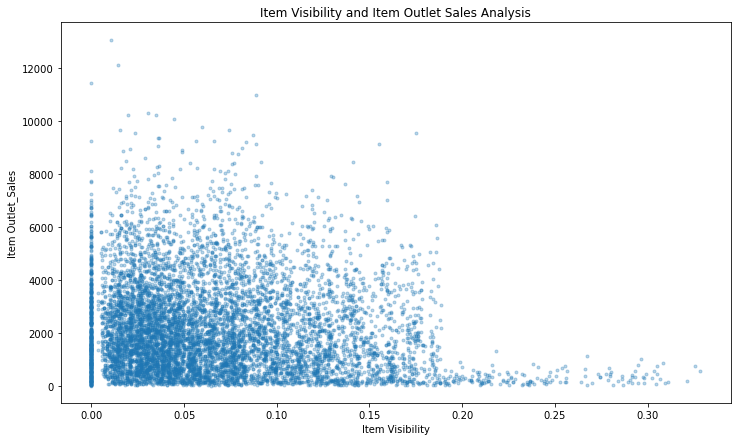

In [42]:
plt.figure(figsize=(12,7))
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet_Sales")
plt.title("Item Visibility and Item Outlet Sales Analysis")
plt.plot(train.Item_Visibility, train["Item_Outlet_Sales"],'.', alpha = 0.3)

As we can see that Item_Visibility has the most lowest i.e negative correlation with the target variable. This plot shows their relation.

**Outlet_Establishment_Year And Item_Outlet_Sales Analysis:**

Text(0.5, 1.0, 'Outlet Establishment Year and Item Outlet Sales Analysis')

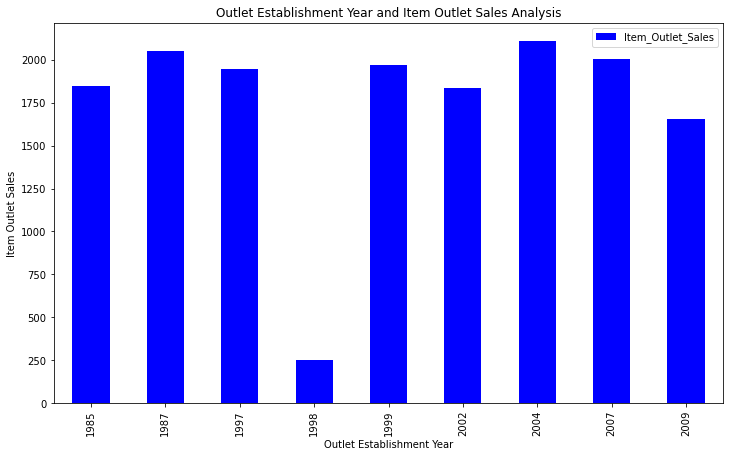

In [43]:
Outlet_Establishment_Year_pivot = train.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet Establishment Year")
plt.ylabel("Item Outlet Sales")
plt.title("Outlet Establishment Year and Item Outlet Sales Analysis")

There seems to be no appreciable meaning between the year of store establishment and the sales for the items.

### For Categorical Variables:

**Box Plot Distribution Of The Variable Item_Fat_Content:**

Text(0, 0.5, 'Item Outlet Sales')

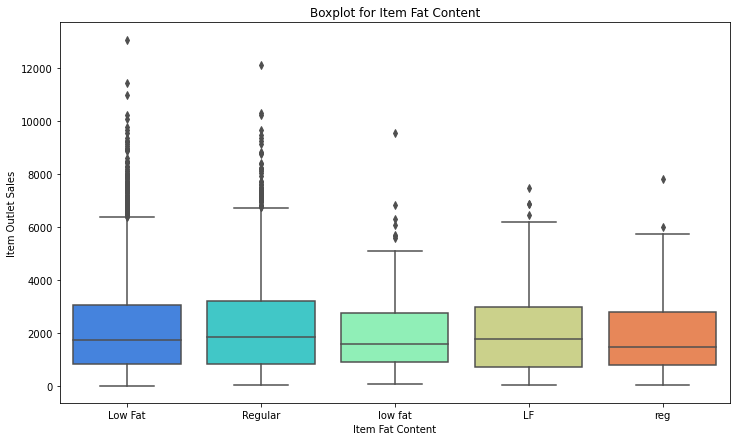

In [44]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=train, palette='rainbow')
plt.title("Boxplot for Item Fat Content")
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")

**Box Plot Distribution Of The Variable Item_Type:**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

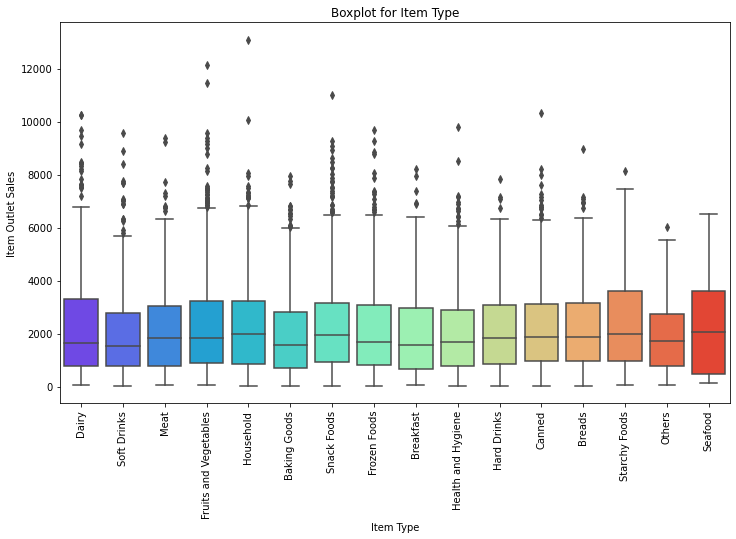

In [45]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=train, palette='rainbow')
plt.title("Boxplot for Item Type")
plt.xlabel("Item Type")
plt.ylabel("Item Outlet Sales")
plt.xticks(rotation=90)

**Box Plot Distribution Of The Variable Outlet_Size:**

Text(0, 0.5, 'Item Outlet Sales')

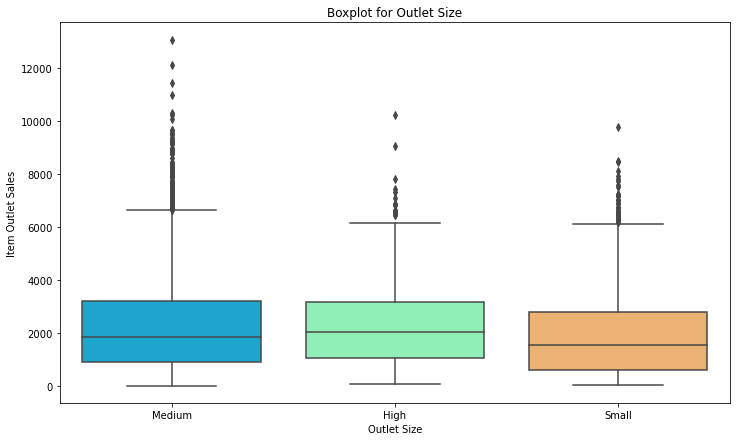

In [46]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train, palette='rainbow')
plt.title("Boxplot for Outlet Size")
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")

**Box Plot Distribution Of The Variable Outlet_Location_Type:**

Text(0, 0.5, 'Item Outlet Sales')

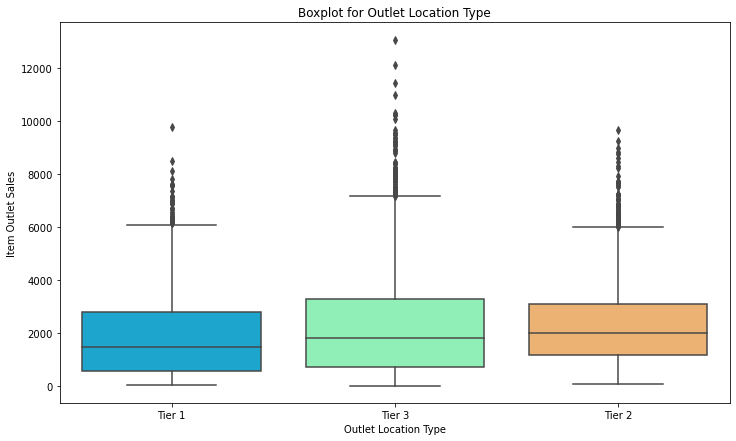

In [47]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train, palette='rainbow')
plt.title("Boxplot for Outlet Location Type")
plt.xlabel("Outlet Location Type")
plt.ylabel("Item Outlet Sales")

**Box Plot Distribution Of The Variable Outlet_Type:**

Text(0, 0.5, 'Item Outlet Sales')

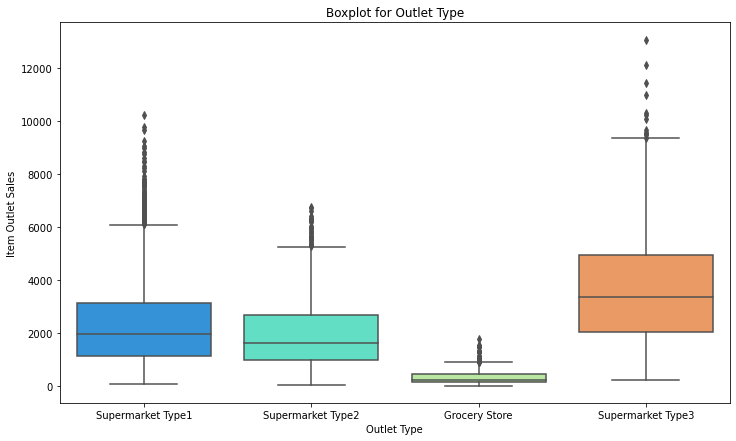

In [48]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train, palette='rainbow')
plt.title("Boxplot for Outlet Type")
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")

There are outliers in each of the above five box plots of the categorical variables along with their impact on target variable.

**Impact Of Item_Fat_Content On Item_Outlet_Sales:**

Text(0.5, 1.0, 'Impact of Item Fat Content on Item Outlet Sales')

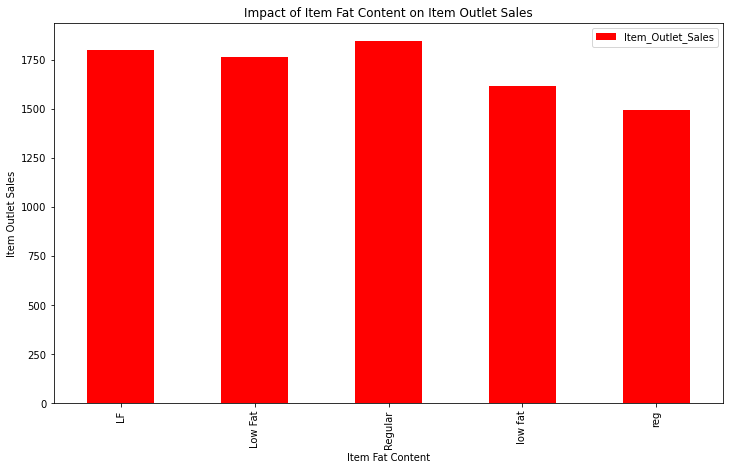

In [49]:
Item_Fat_Content_pivot = train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Item Fat Content")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Item Fat Content on Item Outlet Sales")

Low fat products seem to have higher sales than the regular products.

**Impact Of Outlet_Identifier On Item_Outlet_Sales:**

Text(0.5, 1.0, 'Impact of Outlet Identifier on Item Outlet Sales')

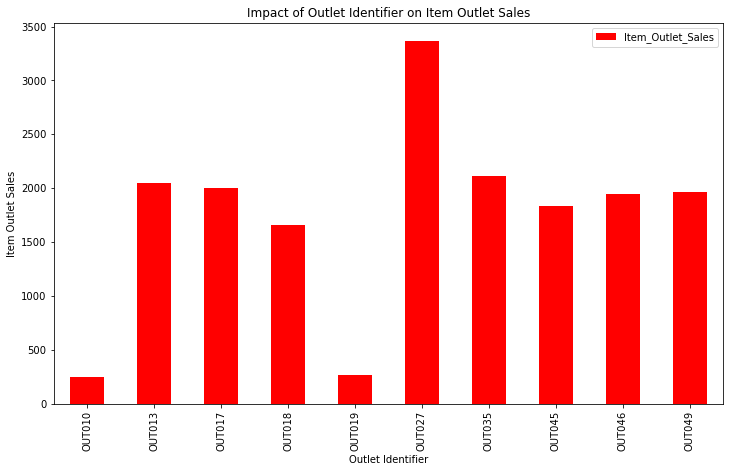

In [50]:
Outlet_Identifier_pivot = train.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Outlet Identifier")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Identifier on Item Outlet Sales")

Out of 10, there are 2 Grocery Store, 6 Supermarket Type1, 1 Supermarket Type2 and 1 Supermarket Type3.

In [51]:
train.pivot_table(values='Outlet_Type',columns='Outlet_Identifier', aggfunc= lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [52]:
train.pivot_table(values='Outlet_Type',columns='Outlet_Size', aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type1,Supermarket Type1


Most stores of Supermarket Type1 are of "High" size but they do not have best results, whereas Supermarket Type3 are of "Medium" size store having best results.

**Impact Of Outlet_Size On Item_Outlet_Sales:**

Text(0.5, 1.0, 'Impact of Outlet Size on Item Outlet Sales')

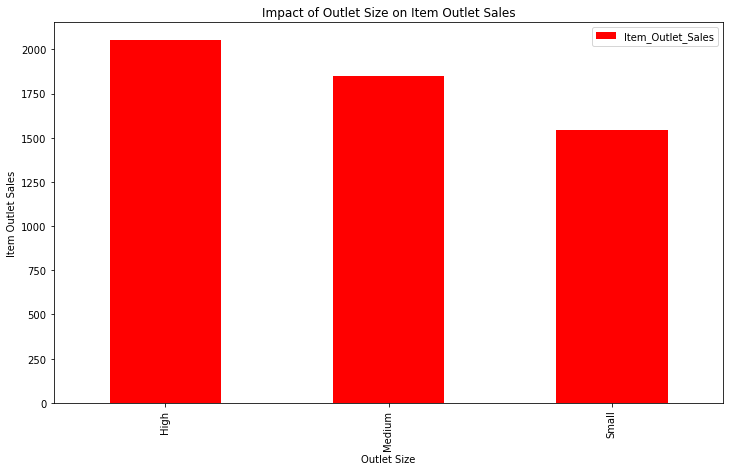

In [53]:
Outlet_Size_pivot = train.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Outlet Size")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Size on Item Outlet Sales")

This plot shows the impact of Outlet_Size on the Item_Outlet_Sales.

**Impact of Outlet_Type on Item_Outlet_Sales:**

Text(0.5, 1.0, 'Impact of Outlet Size on Item Outlet Sales')

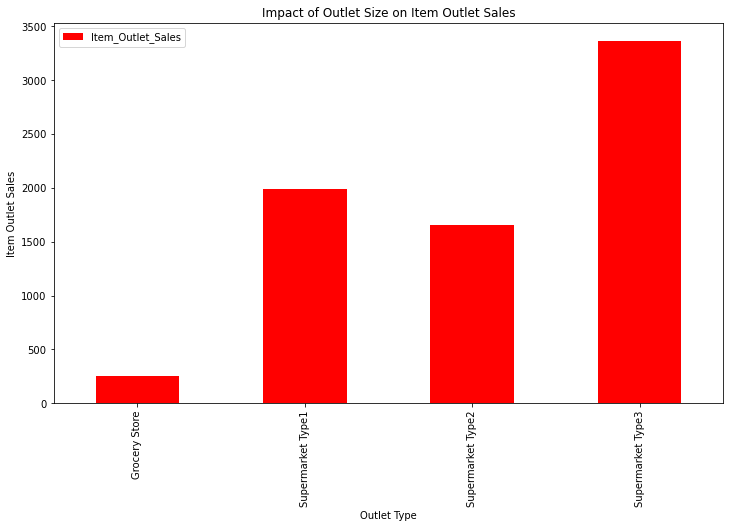

In [54]:
Outlet_Type_pivot = train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Outlet Type")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Size on Item Outlet Sales")

According to the plot above, the Supermarket Type3 of Outlet_Type seems to have been more influenced by Item_Outlet_Sales as compared to the others.

**Impact of Outlet_Location_Type on Item_Outlet_Sales:**

Text(0.5, 1.0, 'Impact of Outlet Location Type on Item Outlet Sales')

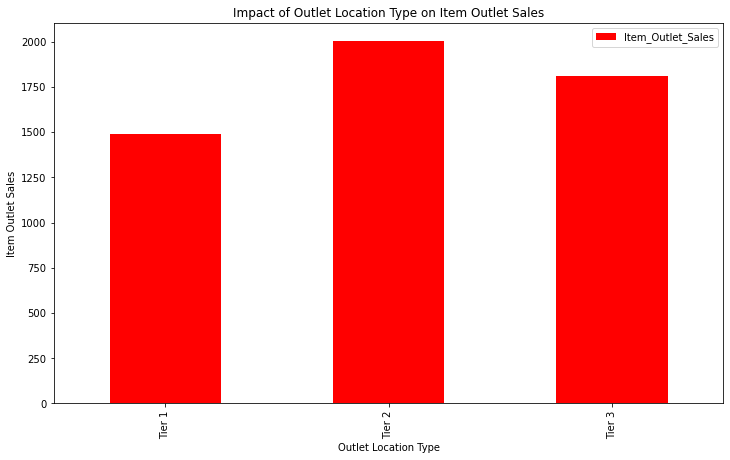

In [55]:
Outlet_Location_Type_pivot = train.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='red',figsize=(12,7))
plt.xlabel("Outlet Location Type")
plt.ylabel("Item Outlet Sales")
plt.title("Impact of Outlet Location Type on Item Outlet Sales")

This above plot shows that Tier 2 cities have higher sales than the Tier 1 and Tier 3 cities.

# Feature Engineering:

### Should We Combine Outlet_Type?:

In [56]:
train.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


We are not combining the Outlet_Type because the average product of sales are different.

### Should We Combine Item_Type?:

In [57]:
train['Item_Type_Combined'] = train['Item_Identifier'].apply(lambda x: x[0:2])
train['Item_Type_Combined'] = train['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
train['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [58]:
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])
test['Item_Type_Combined'] = test['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
test['Item_Type_Combined'].value_counts()

Food              4076
Non-Consumable    1087
Drinks             518
Name: Item_Type_Combined, dtype: int64

Since, the Item_Type has 16 unique categories which are useful in the analysis, a good idea is to combine them. Taking a close look at Item_identifier each item starts with “FD” (Food), “DR” (Drinks) or “NC” (Non-Consumables). We group these items within these 3 categories.

In [59]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable


In [60]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,Food
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,Non-Consumable
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,Food
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,Food


### Modifying Categories Of Item_Fat_Content:

In [61]:
print('Original Categories:')
print(train['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(train['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [62]:
print('Original Categories:')
print(test['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
print(train['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


We have seen some non-consumables previously and a fat-content should not be specified for them. We will create a separate category for such kind of observations.

In [63]:
train.loc[train['Item_Type_Combined'] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
train['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

In [64]:
test.loc[test['Item_Type_Combined'] == "Non-Consumable", "Item_Fat_Content"] = "Non-Edible"
test['Item_Fat_Content'].value_counts()

Low Fat       2581
Regular       2013
Non-Edible    1087
Name: Item_Fat_Content, dtype: int64

Therefore, we have finally created three categories under Item_Fat_Content.

### Removing Features That Are Insignificant From Train And Test Data:

In [65]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

# Encoding Categorical Variables:

### Label Encoding:

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [67]:
train = train.apply(le.fit_transform)
test = test.apply(le.fit_transform)

In [68]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,284,0,664,4,5592,4,1,0,1,2540,1
1,57,2,880,14,473,8,1,2,2,422,0
2,376,0,715,10,2901,4,1,0,1,1639,1
3,393,2,0,6,4227,3,1,2,0,670,1
4,265,1,0,9,627,1,0,2,1,865,2
...,...,...,...,...,...,...,...,...,...,...,...
8518,125,0,3912,13,4955,1,0,2,1,2047,1
8519,233,2,3278,0,2023,5,1,1,1,516,1
8520,299,1,2302,8,1263,6,2,1,1,1018,2
8521,149,2,7175,13,1857,8,1,2,2,1466,1


In [69]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Type_Combined
0,404,0,66,13,1460,4,1,0,1,1
1,223,2,1714,4,965,7,1,1,1,1
2,338,1,4042,11,4076,3,1,2,0,2
3,156,0,388,13,2522,7,1,1,1,1
4,319,2,4423,4,3972,0,1,2,3,1
...,...,...,...,...,...,...,...,...,...,...
5676,293,2,290,13,2164,2,2,0,1,1
5677,178,2,4815,15,2833,8,1,2,2,1
5678,288,1,3256,8,1752,5,1,1,1,2
5679,349,2,0,3,3691,7,1,1,1,1


### One Hot Encoding:

In [70]:
train = pd.get_dummies(train,columns=['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type'])
test = pd.get_dummies(test,columns=['Item_Fat_Content', 'Item_Type', 'Outlet_Size','Outlet_Location_Type','Outlet_Type'])

In [71]:
train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,5592,4,2540,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,57,880,473,8,422,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,376,715,2901,4,1639,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,4227,3,670,1,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,265,0,627,1,865,2,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3912,4955,1,2047,1,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,233,3278,2023,5,516,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0
8520,299,2302,1263,6,1018,2,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,149,7175,1857,8,1466,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [72]:
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,404,66,1460,4,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,223,1714,965,7,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
2,338,4042,4076,3,2,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0
3,156,388,2522,7,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,319,4423,3972,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,293,290,2164,2,1,0,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
5677,178,4815,2833,8,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5678,288,3256,1752,5,2,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
5679,349,0,3691,7,1,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0


# PreProcessing Data:

### Seperating Training And Test Data:

In [73]:
X = train.drop(['Item_Outlet_Sales'],axis=1)
Y = train['Item_Outlet_Sales']

In [74]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,284,664,5592,4,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,57,880,473,8,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,376,715,2901,4,1,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,393,0,4227,3,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,265,0,627,1,2,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,125,3912,4955,1,1,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,233,3278,2023,5,1,0,0,1,1,0,...,0,1,0,0,1,0,0,1,0,0
8520,299,2302,1263,6,2,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,149,7175,1857,8,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [75]:
Y

0       2540
1        422
2       1639
3        670
4        865
        ... 
8518    2047
8519     516
8520    1018
8521    1466
8522     697
Name: Item_Outlet_Sales, Length: 8523, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

### Standardization:

In [77]:
X.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,298.756776,3709.198639,2941.096562,3.790684,1.093864,0.459697,0.187610,0.352693,0.076030,0.029450,...,0.109351,0.610466,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,95.451067,2396.606857,1675.483234,2.730322,0.522090,0.498402,0.390423,0.477836,0.265061,0.169073,...,0.312098,0.487673,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,285.000000,1595.500000,1535.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,326.000000,3708.000000,2949.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,361.000000,5789.500000,4351.500000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,415.000000,7879.000000,5937.000000,8.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [79]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [80]:
X_train_std

array([[ 0.4225872 ,  1.65870657, -1.04324301, ...,  0.72137879,
        -0.34725499, -0.35238561],
       [ 1.07626847,  0.02829787,  0.18131851, ...,  0.72137879,
        -0.34725499, -0.35238561],
       [ 0.8687506 ,  1.64780644,  0.3390951 , ..., -1.38623427,
         2.87972827, -0.35238561],
       ...,
       [ 0.28770059,  0.99631373,  0.45145116, ..., -1.38623427,
        -0.34725499,  2.83780034],
       [ 1.1800274 , -1.13843585, -0.08821651, ...,  0.72137879,
        -0.34725499, -0.35238561],
       [ 0.28770059,  0.33811325, -1.30859455, ..., -1.38623427,
        -0.34725499, -0.35238561]])

In [81]:
X_test_std

array([[ 0.6448093 ,  0.19341604, -1.50958559, ...,  0.73951636,
        -0.35487422, -0.34784991],
       [-1.17872724, -0.04520261, -1.1470565 , ...,  0.73951636,
        -0.35487422, -0.34784991],
       [ 0.89152307,  0.13809614,  1.23646811, ..., -1.35223512,
         2.81789983, -0.34784991],
       ...,
       [ 0.28010199, -1.14251813,  0.94299218, ..., -1.35223512,
        -0.35487422, -0.34784991],
       [ 1.04169667, -0.98687932, -1.48517887, ..., -1.35223512,
         2.81789983, -0.34784991],
       [ 0.7949829 , -0.57363145, -0.86370043, ..., -1.35223512,
         2.81789983, -0.34784991]])

# Modelling:

### Linear Regression:

In [82]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [83]:
Y_pred_lr = lr.predict(X_test)
Y_pred_lr

array([ 881.87754326,  970.00971647, 2102.90096031, ...,  887.1033569 ,
        584.39429779,  909.127258  ])

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

The R squared score of the linear regression is  0.6381963380865726
The mean absolute error of the linear regression is  446.18845123619843
The mean squared error of the linear regression is  558.9730905930107


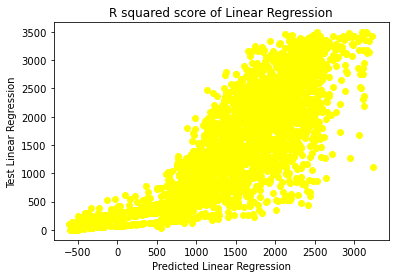

In [85]:
print("The R squared score of the linear regression is ",r2_score(Y_test,Y_pred_lr))
plt.scatter(Y_pred_lr,Y_test, color = 'Yellow')
plt.xlabel("Predicted Linear Regression")
plt.ylabel("Test Linear Regression")
plt.title('R squared score of Linear Regression')
print("The mean absolute error of the linear regression is ",mean_absolute_error(Y_test,Y_pred_lr))
print("The mean squared error of the linear regression is ",np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

### Regularized Linear Regression:

**1)Lasso Regression:**

In [86]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(X_train,Y_train)

Lasso()

In [87]:
Y_pred_ls = ls.predict(X_test)
Y_pred_ls

array([ 848.643149  , 1019.39325436, 2121.31339657, ...,  875.62744293,
        646.39225981,  970.52804621])

The R squared score of the lasso regression is  0.6386188226622993
The mean absolute error of the lasso regression is  445.9578342118639
The mean squared error of the lasso regression is  558.6466338493371


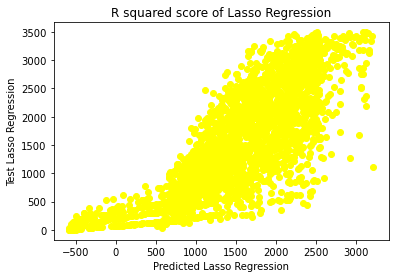

In [88]:
print("The R squared score of the lasso regression is ",r2_score(Y_test,Y_pred_ls))
plt.scatter(Y_pred_ls,Y_test, color = 'Yellow')
plt.xlabel("Predicted Lasso Regression")
plt.ylabel("Test Lasso Regression")
plt.title('R squared score of Lasso Regression')
print("The mean absolute error of the lasso regression is ",mean_absolute_error(Y_test,Y_pred_ls))
print("The mean squared error of the lasso regression is ",np.sqrt(mean_squared_error(Y_test,Y_pred_ls)))

**2)Ridge Regression:**

In [89]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(X_train,Y_train)

Ridge()

In [90]:
Y_pred_rr = rr.predict(X_test)
Y_pred_rr

array([ 880.60299237,  972.80454211, 2103.21318059, ...,  887.21836722,
        586.44142789,  911.10324652])

The R squared score of the ridge regression is  0.6382365641817831
The mean absolute error of the ridge regression is  446.17452279932274
The mean squared error of the ridge regression is  558.9420158249044


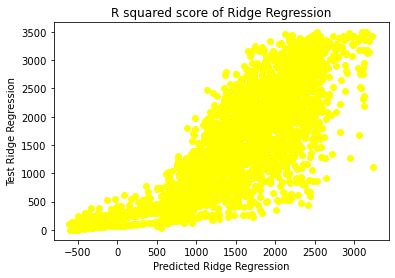

In [91]:
print("The R squared score of the ridge regression is ",r2_score(Y_test,Y_pred_rr))
plt.scatter(Y_pred_rr,Y_test, color = 'Yellow')
plt.xlabel("Predicted Ridge Regression")
plt.ylabel("Test Ridge Regression")
plt.title('R squared score of Ridge Regression')
print("The mean absolute error of the ridge regression is ",mean_absolute_error(Y_test,Y_pred_rr))
print("The mean squared error of the ridge regression is ",np.sqrt(mean_squared_error(Y_test,Y_pred_rr)))

### Random Forest Regression:

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [93]:
Y_pred_rf = rf.predict(X_test)
Y_pred_rf

array([ 590.41, 1104.79, 2146.63, ...,  453.9 ,  609.3 ,  860.23])

The R squared score of the random forest regression is  0.6234124030389375
The mean absolute error of the random forest regression is  431.5635979663668
The mean squared error of the random forest regression is  570.2790640623771


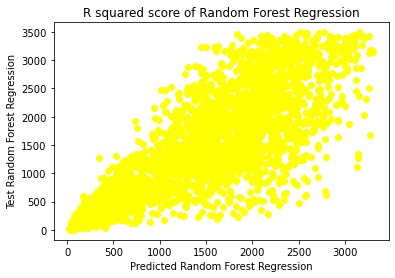

In [94]:
print("The R squared score of the random forest regression is ",r2_score(Y_test,Y_pred_rf))
plt.scatter(Y_pred_rf,Y_test, color = 'Yellow')
plt.xlabel("Predicted Random Forest Regression")
plt.ylabel("Test Random Forest Regression")
plt.title('R squared score of Random Forest Regression')
print("The mean absolute error of the random forest regression is ",mean_absolute_error(Y_test,Y_pred_rf))
print("The mean squared error of the random forest regression is ",np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

### XG Boost Regression:

In [95]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 10)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [96]:
Y_pred_xgb = xgb.predict(X_test)
Y_pred_xgb

array([ 655.54254,  980.0285 , 2106.0632 , ...,  494.22128,  602.1332 ,
        929.13995], dtype=float32)

The R squared score of the xg boost regression is  0.6562823375594343
The mean absolute error of the xg boost regression is  416.6769272763607
The mean squared error of the xg boost regression is  544.8228915453894


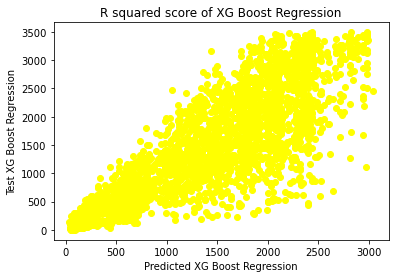

In [97]:
print("The R squared score of the xg boost regression is ",r2_score(Y_test,Y_pred_xgb))
plt.scatter(Y_pred_xgb,Y_test, color = 'Yellow')
plt.xlabel("Predicted XG Boost Regression")
plt.ylabel("Test XG Boost Regression")
plt.title('R squared score of XG Boost Regression')
print("The mean absolute error of the xg boost regression is ",mean_absolute_error(Y_test,Y_pred_xgb))
print("The mean squared error of the xg boost regression is ",np.sqrt(mean_squared_error(Y_test,Y_pred_xgb)))

# Hyper Parameter Tuning:

### Random Forest Regression:

In [98]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)
grid_search_rf = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_rf.fit(X_train, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 1000]}, scoring='r2',
             verbose=2)

In [99]:
print(f"Best: {grid_search_rf.best_score_:.3f} using {grid_search_rf.best_params_}")

Best: 0.616 using {'n_estimators': 1000}


In [100]:
means = grid_search_rf.cv_results_['mean_test_score']
stds = grid_search_rf.cv_results_['std_test_score']
params = grid_search_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

0.585 (0.003) with: {'n_estimators': 10}
0.611 (0.004) with: {'n_estimators': 100}
0.616 (0.005) with: {'n_estimators': 1000}


### XG Boost Regression:

In [101]:
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
n_estimators = [10, 100, 1000]
grid = dict(n_estimators=n_estimators)
grid_search_xgb = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1,scoring='r2',error_score=0,verbose=2,cv=2)
grid_search_xgb.fit(X_train, Y_train)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


GridSearchCV(cv=2, error_score=0,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_e

In [102]:
print(f"Best: {grid_search_xgb.best_score_:.3f} using {grid_search_xgb.best_params_}")

Best: 0.636 using {'n_estimators': 10}


In [103]:
means = grid_search_xgb.cv_results_['mean_test_score']
stds = grid_search_xgb.cv_results_['std_test_score']
params = grid_search_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

0.636 (0.006) with: {'n_estimators': 10}
0.580 (0.001) with: {'n_estimators': 100}
0.532 (0.008) with: {'n_estimators': 1000}


# Summary:

Therefore, XG Boost Regression has the highest R squared score. Hence, applying this model to the test dataset to predict item outlet sales.

# Final Prediction On The Test Dataset:

In [104]:
Item_Outlet_Sales_Pred = xgb.predict(test)
Item_Outlet_Sales_Pred

array([1138.834  ,  949.31635,  361.50452, ..., 1268.1957 , 1919.3264 ,
        800.9018 ], dtype=float32)

In [105]:
test['Item_Outlet_Sales'] = Item_Outlet_Sales_Pred

In [106]:
test

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Type_Combined,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Item_Type_0,Item_Type_1,...,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Outlet_Sales
0,404,66,1460,4,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,0,1138.833984
1,223,1714,965,7,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,949.316345
2,338,4042,4076,3,2,0,1,0,0,0,...,1,0,0,0,1,1,0,0,0,361.504517
3,156,388,2522,7,1,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1541.563599
4,319,4423,3972,0,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,2556.356689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,293,290,2164,2,1,0,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1391.364380
5677,178,4815,2833,8,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,1311.458496
5678,288,3256,1752,5,2,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,1268.195679
5679,349,0,3691,7,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1919.326416


# Saving The Final Model Dataset:

In [107]:
test.to_csv(r"D:/Technocolabs/Prediction of BigMart Sales/Test_New.csv", index=False)